# Comparison of edge detectors

#### 1. Gradient method
#### 2. FFT method

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

### a) I/O Function:

In [2]:
# I/O Function
def io_image(f_name):
    """
    This is an image reading function
    Input:  f_name -> filename path
    Output: im_arr -> image channels as an array
    """
    # Call the PIL reader
    im = Image.open(f_name)

    # Convert to an array
    im_arr = np.array(im)

    # Return statement
    return im_arr

In [3]:
# Paths to the images
f_im_bw = "./clouds_bw.jpg"
f_im_cl = "./clouds.jpg"

# Test call
bw = io_image(f_im_bw)
cl = io_image(f_im_cl)

# Analyse the sizes
print("B/W image shape is: ", bw.shape)
print("C/L image shape is: ", cl.shape)

B/W image shape is:  (311, 453, 3)
C/L image shape is:  (2304, 3072, 3)


### b) Image inspection

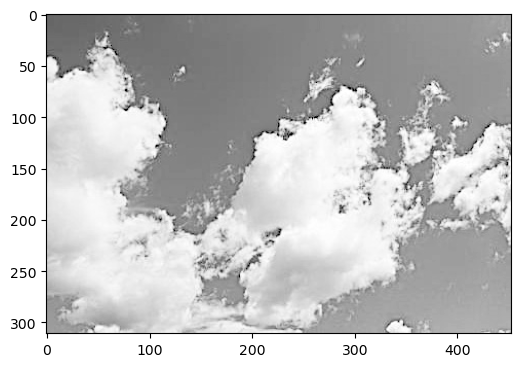

In [4]:
# Image B/W
plt.figure(figsize = (6,5))

plt.imshow(bw[:,:,0], cmap = "Greys_r")

plt.show()

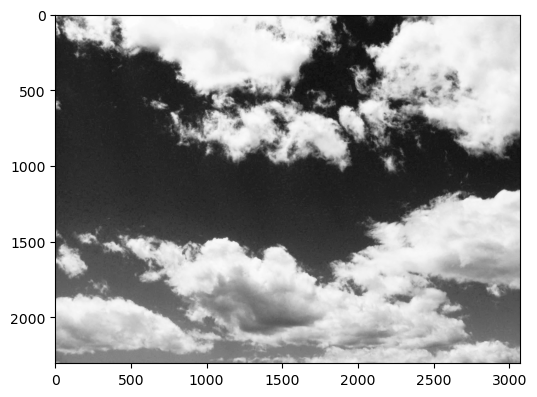

In [5]:
# Image C/L
plt.figure(figsize = (6,5))

plt.imshow(cl[:,:,0], cmap = "Greys_r")

plt.show()

In [6]:
# Pixel Intensity Scale
print("Min B/W: ", np.min(bw[:,:,0]))
print("Max B/W: ", np.max(bw[:,:,0]))

print("Min C/L: ", np.min(cl[:,:,0]))
print("Max C/L: ", np.max(cl[:,:,0]))

Min B/W:  0
Max B/W:  255
Min C/L:  35
Max C/L:  253


## c) Edge detector 1: Derivatives

In [7]:
# Edge detector based on derivatives

def edge_detector1(im_channel):
    """
    Edge detector funtion that uses intensity gradient maps.
    Input:  im_channel -> 1 channel
    Output: grad_mag -> Gradient map
    """
    # Gradient of the image
    grad_ch = np.gradient(im_channel)

    # Magnitude of the  gradient
    grad_mag = np.sqrt(grad_ch[0]**2 + grad_ch[1]**2)

    # Isolate large gradients
    grad_bin = np.where(grad_mag > 10, 1., 0.)
    
    # Return the gradient
    return grad_bin

In [8]:
# Call our edge detector 1
map_1 = edge_detector1(cl[:,:,2])

print(map_1.shape, np.max(map_1), np.min(map_1), np.unique(map_1))

(2304, 3072) 1.0 0.0 [0. 1.]


In [9]:
print(map_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


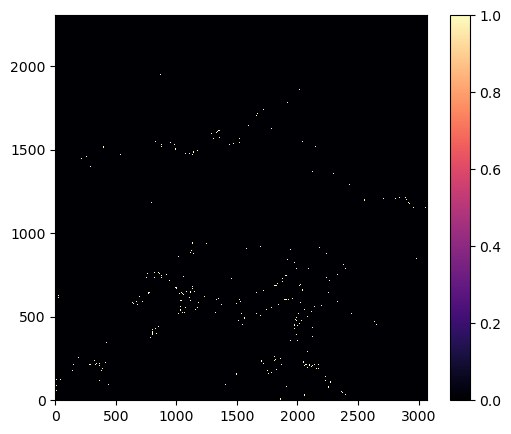

In [10]:
# Image B/W
plt.figure(figsize = (6,5))

z = plt.pcolor(map_1, cmap = "magma")

plt.colorbar(z)

plt.show()

### d) Edge detector 2: FFT

#### Mask:

In [11]:
# Offset from the centre
r_off = 10

im1 = Image.new(mode="RGB", size=(bw[:,:,0].shape[1], bw[:,:,0].shape[0]))
draw = ImageDraw.Draw(im1)
draw.ellipse((bw[:,:,0].shape[1]//2 - r_off, bw[:,:,0].shape[0]//2 - r_off,\
              bw[:,:,0].shape[1]//2 + r_off, bw[:,:,0].shape[0]//2 + r_off), fill=(255, 0, 0), outline=(0, 0, 0))

# Binary image
mask_1 = np.array(im1)[:,:,0]//255

mask_2 = - mask_1 + 1


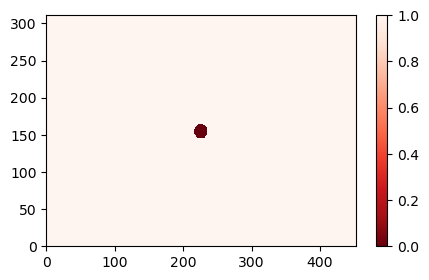

In [12]:
# Plotting
plt.figure(figsize=(5,3))

z = plt.pcolor(mask_2, cmap = "Reds_r")

plt.colorbar(z)

plt.show()


### Edge dectetor 2 function (FFT):

In [13]:
# Edge detector based on derivatives

def edge_detector2(im_channel):
    """
    Edge detector funtion that uses FFT.
    Input:  im_channel -> 1 channel
    Output: fft_map -> Binary map
    """
    # Gradient of the image
    fft_ch = np.fft.fft2(im_channel)

    # Shifted image with low freq in the centre
    fft_sh = np.fft.fftshift(fft_ch)

    # Norm of the Fourier powers
    #fft_nr = np.abs(fft_sh)  # Not needed

    # Construct the mas
    # Offset from the centre
    r_off = 10
    
    im1 = Image.new(mode="RGB", size=(im_channel.shape[1], im_channel.shape[0]))
    draw = ImageDraw.Draw(im1)
    draw.ellipse((im_channel.shape[1]//2 - r_off, im_channel.shape[0]//2 - r_off,\
                  im_channel.shape[1]//2 + r_off, im_channel.shape[0]//2 + r_off),\
                  fill=(255, 0, 0), outline=(0, 0, 0))
    
    # Binary mask
    mask = np.array(im1)[:,:,0]//255
    mask = - mask + 1

    # Apply the mask to our image
    im_fft = fft_sh*mask

    # Go back to Real Space
    inv_fft = np.fft.ifftshift(im_fft)
    inv_fft2 = np.fft.ifft2(inv_fft)

    # Isolate high values
    fft_bin = np.where(np.abs(inv_fft2.real) > 22, 1., 0.)

    # Return the gradient
    return fft_bin

In [14]:
# Call our edge detector 2
map_2 = edge_detector2(bw[:,:,0])

#print(map_2.shape)

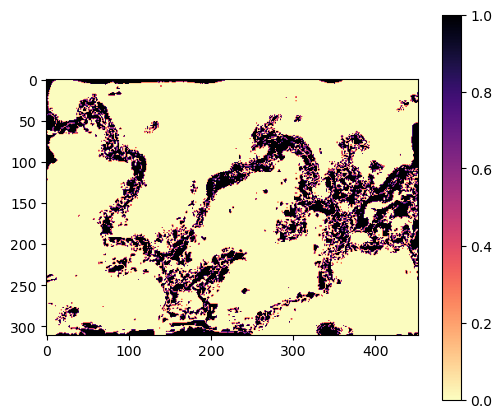

In [15]:
# Plotting
plt.figure(figsize=(6,5))

z = plt.imshow(map_2,  cmap = "magma_r", clim = (0, 1))

plt.colorbar(z)

plt.show()


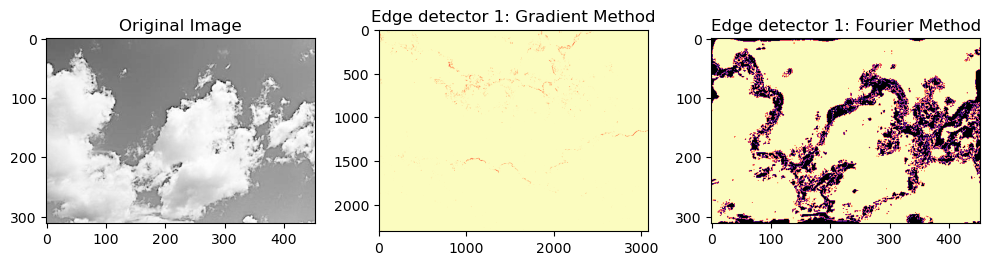

In [16]:
# Create the figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 7)) # 1 row, 3=2 columns

ax[0].imshow(bw[:,:,0],  cmap = "Greys_r")
ax[0].set_title("Original Image")

ax[1].imshow(map_1,  cmap = "magma_r", clim = (0, 1))
ax[1].set_title("Edge detector 1: Gradient Method")

ax[2].imshow(map_2,  cmap = "magma_r", clim = (0, 1))
ax[2].set_title("Edge detector 1: Fourier Method")

plt.tight_layout()
plt.show()

### d) Funtion for processing and reconstructing images

In [17]:
# Reconstruction function
def im_reconstruction(img_file):
    """
    The is a wrapper function that call all the other functions above,
    applies the edge detectors (1 & 2) to all input image channels, and
    returns a reconstructed image with edges (binary image).
    Input:  img_file -> Any 3 channel image
    Output: bin_edge -> 3 channel binary image with edges
    """
    # Call I/O function
    img = io_image(img_file)

    # Empty arrays
    rec_gd = np.zeros((img.shape))
    rec_fo = np.zeros((img.shape))
    
    # Separate the channels
    for i in range(len(img[0,0,:])):
        #print(i)
        # Channel i
        ch0 = img[:,:,i]
        
        # Edge Detector 1: Gradient Method
        grad0 = edge_detector1(ch0)

        # Fill up the gradient channels
        rec_gd[:,:,i] = grad0
        
        # Edge Detector 2: Fourier Method
        four0 = edge_detector2(ch0)

        # Fill up one channel
        rec_fo[:,:,i] = four0
        
    return img, rec_gd, rec_fo
    

In [18]:
img_bw, rec_gd_bw, rec_fo_bw = im_reconstruction(f_im_bw)

print(rec_gd_bw.shape, rec_fo_bw.shape)

(311, 453, 3) (311, 453, 3)


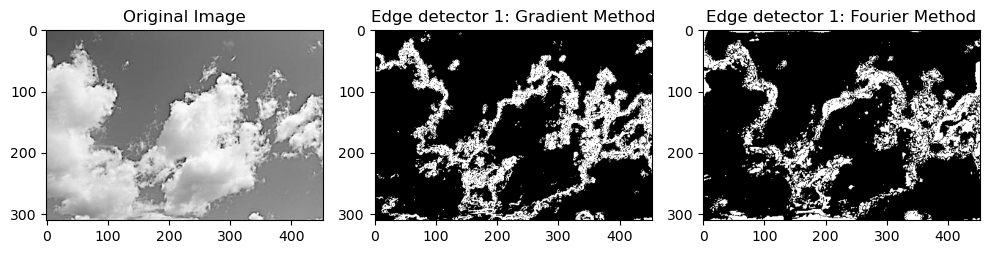

In [19]:
# Create the figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 7)) # 1 row, 3=2 columns

ax[0].imshow(img_bw,  cmap = "Greys_r")
ax[0].set_title("Original Image")

ax[1].imshow(rec_gd_bw,  cmap = "magma_r", clim = (0, 1))
ax[1].set_title("Edge detector 1: Gradient Method")

ax[2].imshow(rec_fo_bw,  cmap = "magma_r", clim = (0, 1))
ax[2].set_title("Edge detector 1: Fourier Method")

plt.tight_layout()
plt.show()

In [20]:
img_bw, rec_gd_bw, rec_fo_bw = im_reconstruction(f_im_cl)

print(rec_gd_bw.shape, rec_fo_bw.shape)

(2304, 3072, 3) (2304, 3072, 3)


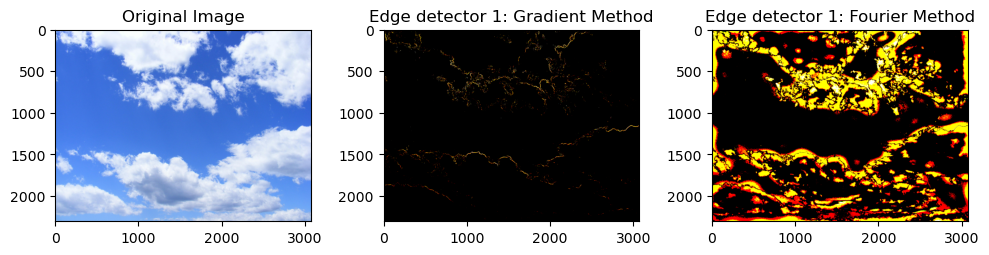

In [21]:
# Create the figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 7)) # 1 row, 3=2 columns

ax[0].imshow(img_bw,  cmap = "Greys_r")
ax[0].set_title("Original Image")

ax[1].imshow(rec_gd_bw,  cmap = "magma_r")
ax[1].set_title("Edge detector 1: Gradient Method")

ax[2].imshow(rec_fo_bw,  cmap = "magma_r", clim = (0, 1))
ax[2].set_title("Edge detector 1: Fourier Method")

plt.tight_layout()
plt.show()